In [1]:
#classification problem
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

c:\Users\abhis\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
od=pd.read_csv(r"A:\Projects\Implementation\1.Brain Stroke Prediction\Data.csv")

In [3]:
od.shape

(4981, 11)

In [4]:
od.head(30)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [5]:
od.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
obj_cols=od.select_dtypes(include='object').columns
obj_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [7]:
num_cols=od.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

###### Univariate Analysis
Target Variable:Stroke

In [8]:
od['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

categorical Columns:

In [9]:
od['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

Female    0.583618
Male      0.416382
Name: gender, dtype: float64
Yes    0.658502
No     0.341498
Name: ever_married, dtype: float64
Private          0.574182
Self-employed    0.161413
children         0.135113
Govt_job         0.129291
Name: work_type, dtype: float64
Urban    0.508332
Rural    0.491668
Name: Residence_type, dtype: float64
never smoked       0.369002
Unknown            0.301144
formerly smoked    0.174061
smokes             0.155792
Name: smoking_status, dtype: float64


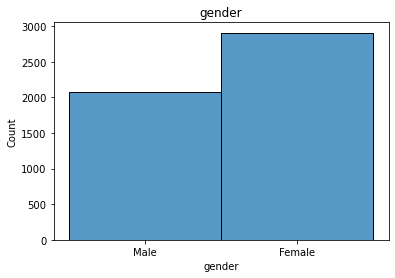

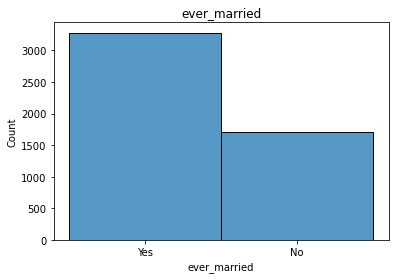

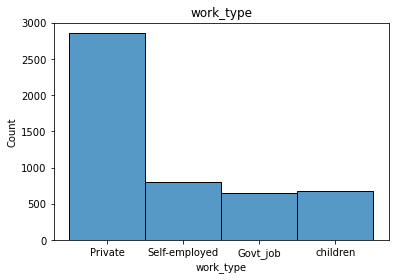

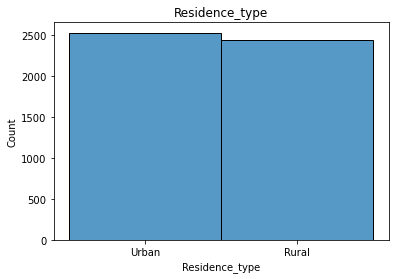

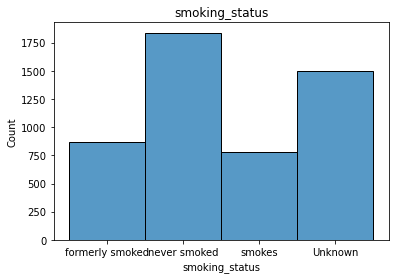

In [10]:
for i in obj_cols:
    print(od[i].value_counts(normalize=True))
for i in obj_cols:
    plt.title(i)
    sns.histplot(x=od[i])
    plt.show()

### Inference:
1) The data contains more records of Females than Males.<br>
2) The data contains more records of people ever married than never married.<br>
3) The data contains most records of private employes than any other in work type category others are almost equally distributed.<br>
4) The data contains more records we have almost equal distribution in residence type.<br>
5) The data contains more recordsWe have more data of people who never smoked than to any other category in smoking_status Feature.

Numerical Columns

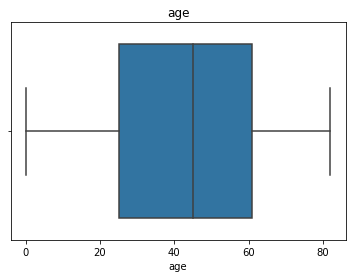

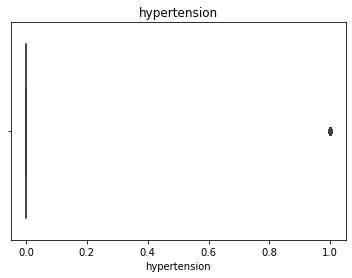

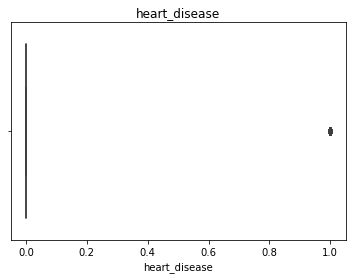

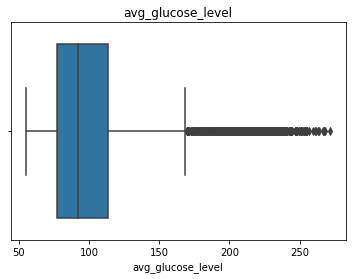

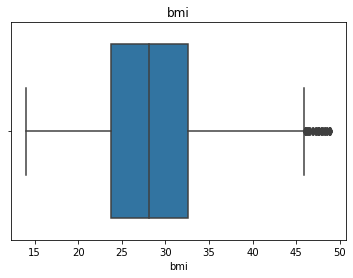

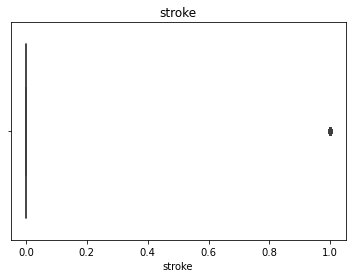

In [11]:
# For outliers and distribution
for i in num_cols:
    sns.boxplot(x=od[i])
    plt.title(i)
    plt.show()

### Inference:
1)We have outliers in avg glucose level,bmi

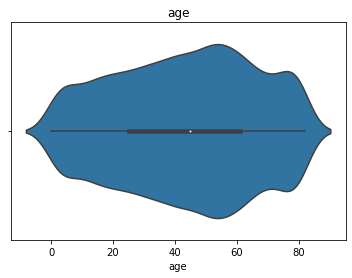

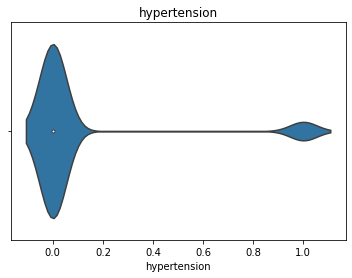

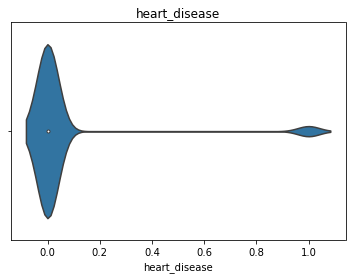

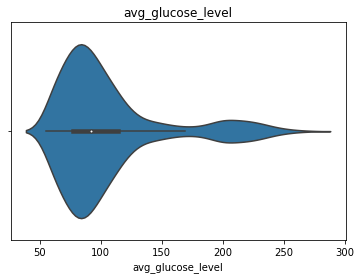

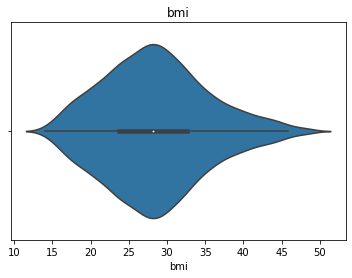

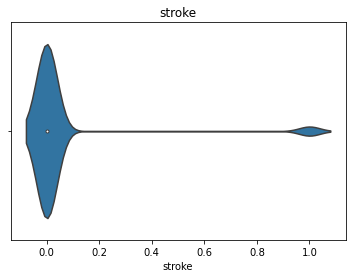

In [12]:
for i in num_cols:
    sns.violinplot(x=od[i])
    plt.title(i)
    plt.show()

### Inference:
1)we have data more distributed between people of age group betweeen 40 to 58 years<br>
2)No of people with no hypertension is more than people with hypertension.<br>
3)Most of people are with no heart disease.<br>
4)The average Glucose level of maximum people is between 84 to 100.<br>
5)The BMI of most people is between 26 to 30.<br>
6)The data Collected Contains more Records of People with no stroke then with stroke.

In [13]:
od.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,4981.0,43.419859,22.662755,0.08,1.080,1.800,2.000,3.000,5.00,11.00,25.00,45.00,61.00,75.00,79.0,79.000,80.000,81.000,82.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.000,1.000,1.000,1.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.000,1.000,1.000,1.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,56.328,57.444,58.526,59.672,60.73,65.79,77.23,91.85,113.86,191.47,216.0,219.968,226.864,232.018,240.82,271.74
bmi,4981.0,28.498173,6.790464,14.00,15.500,16.300,16.940,17.400,17.90,19.80,23.70,28.10,32.60,37.80,41.1,41.880,43.000,43.940,45.50,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.000,1.000,1.000,1.00,1.00


Bi-Variate Analysis:

CAT-CAT

In [14]:
# Chi Square Test

# Null Hypo (Ho) : features are independent
# Alter Hypo(Ha) : features  are associated
# CI - 95% 
#Alpha=.05
# Decision Rule :
#     if p value >= Alpha , Accept Null hypo
#     If p value < Alpha , Reject Null Hyp - Accept alternative Hypothesis

In [15]:
obj_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [16]:
from scipy import stats

In [17]:
ct=pd.crosstab(od["gender"], od["smoking_status"])        #cross tab is used to have frequency distribution of different category of a feature
stats.chi2_contingency(ct) 

(54.541149176993294,
 8.601943275746322e-12,
 3,
 array([[ 875.42662116,  505.99658703, 1072.6894198 ,  452.88737201],
        [ 624.57337884,  361.00341297,  765.3105802 ,  323.11262799]]))

In [18]:
ct=pd.crosstab(od["work_type"], od["smoking_status"])        #cross tab is used to have frequency distribution of different category of a feature
stats.chi2_contingency(ct) 

(1345.126864376727,
 5.534741812402933e-284,
 9,
 array([[ 193.93696045,  112.09556314,  237.6374222 ,  100.33005421],
        [ 861.27283678,  497.81569966, 1055.346316  ,  445.56514756],
        [ 242.12005621,  139.94539249,  296.67777555,  125.25677575],
        [ 202.67014656,  117.14334471,  248.33848625,  104.84802249]]))

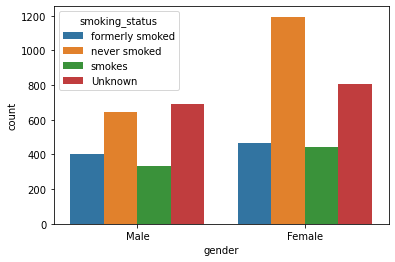

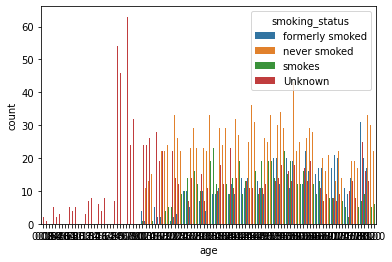

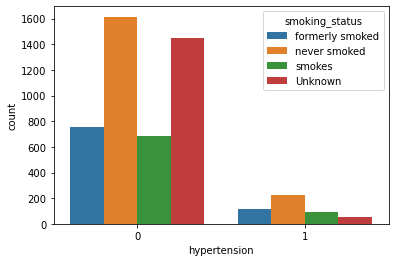

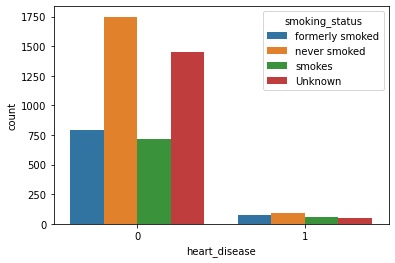

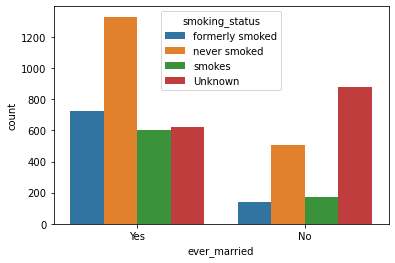

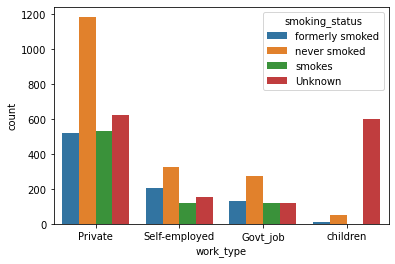

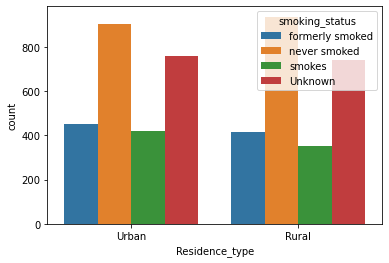

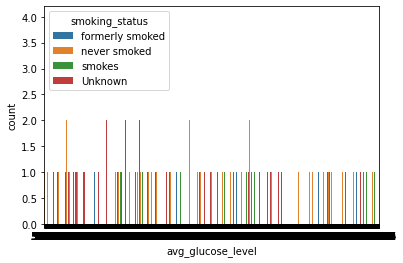

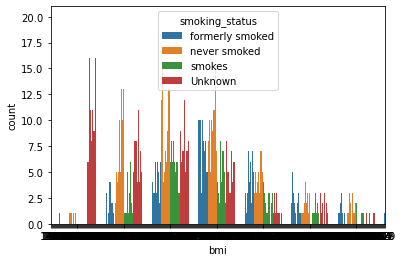

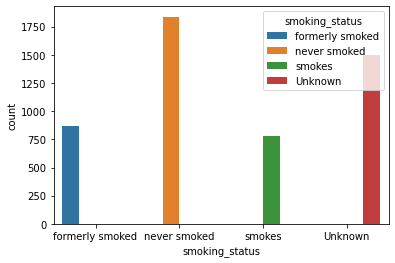

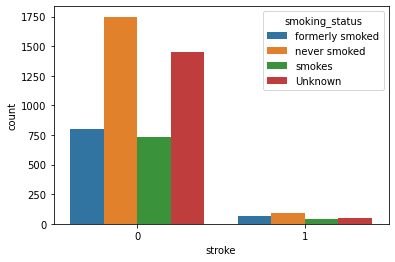

In [19]:
for i in od:
    sns.countplot(x=od[i],hue=od['smoking_status'])
    plt.show()

### Inference:
According To Data:<br>
1)Females Smoke more than males also the females who dont smoke is more than males(As No. of females in record is more than no. of males)<br>
2)people with no hypertension smoke more than people with hypertension.<br>
3)People with No heart disease Smoke more than people with heart disease.<br>
4)People in private jobs smoke alot and childrens dont smoke at all.<br>
5)Residence type has no effect on smoking.<br>
6)People with no stroke smoke more than people with stroke.

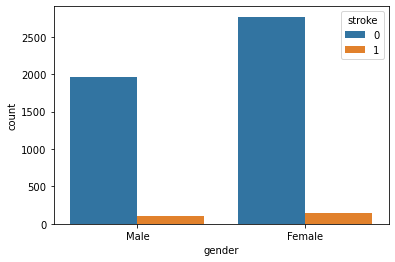

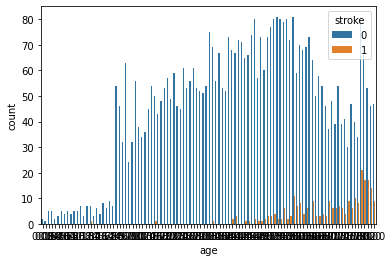

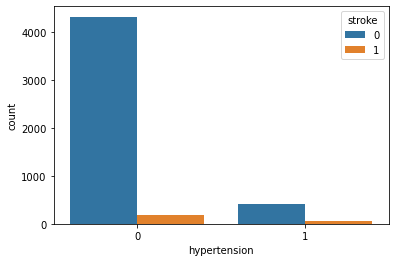

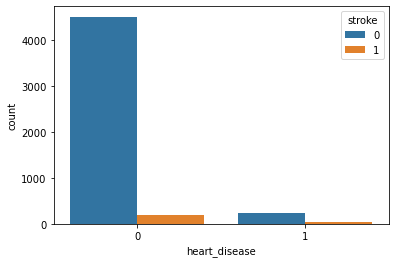

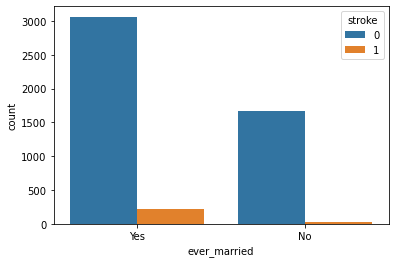

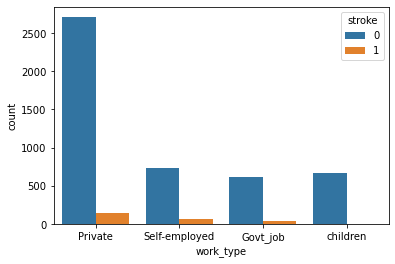

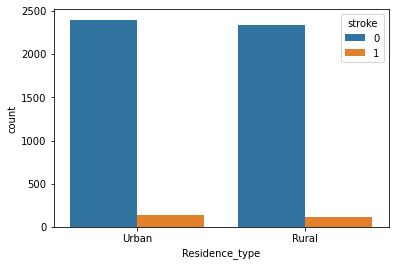

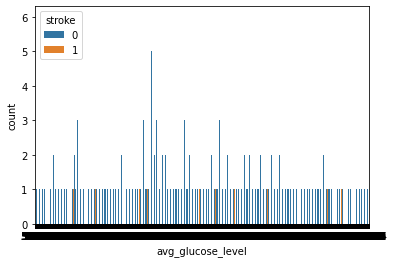

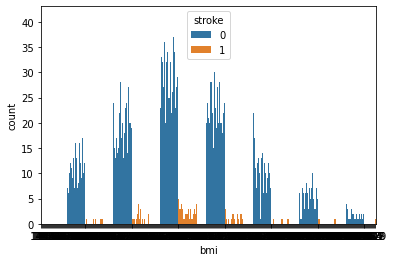

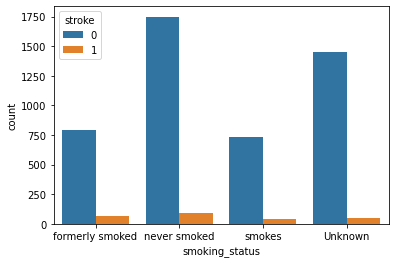

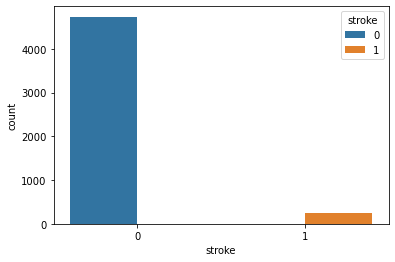

In [20]:
#feature relation with target variable
for i in od:
    sns.countplot(x=od[i],hue=od['stroke'])
    plt.show()

###### Inference:
1)Females Get more strokes compared to male.<br>
2)Age and Stroke has positive relation(as age increase no of stroke are increasing).<br>
3)People with no hypertension are getting more strokes than people with no hypertension.<br>
4)People with no heart_disease are getting more stroke than people with no heart disease.<br>
5)people who ever married are getting more stroke than people who never married.<br>
6)people in private jobs are getting more strokes followed by self employed and,govt jobs as least and childrens with no strokes.<br>
7)People living in Urban are getting slight higher count of strokes then people living in rural.<br>
8)people who never smoked recorded higher strokes than people who do smoke. 


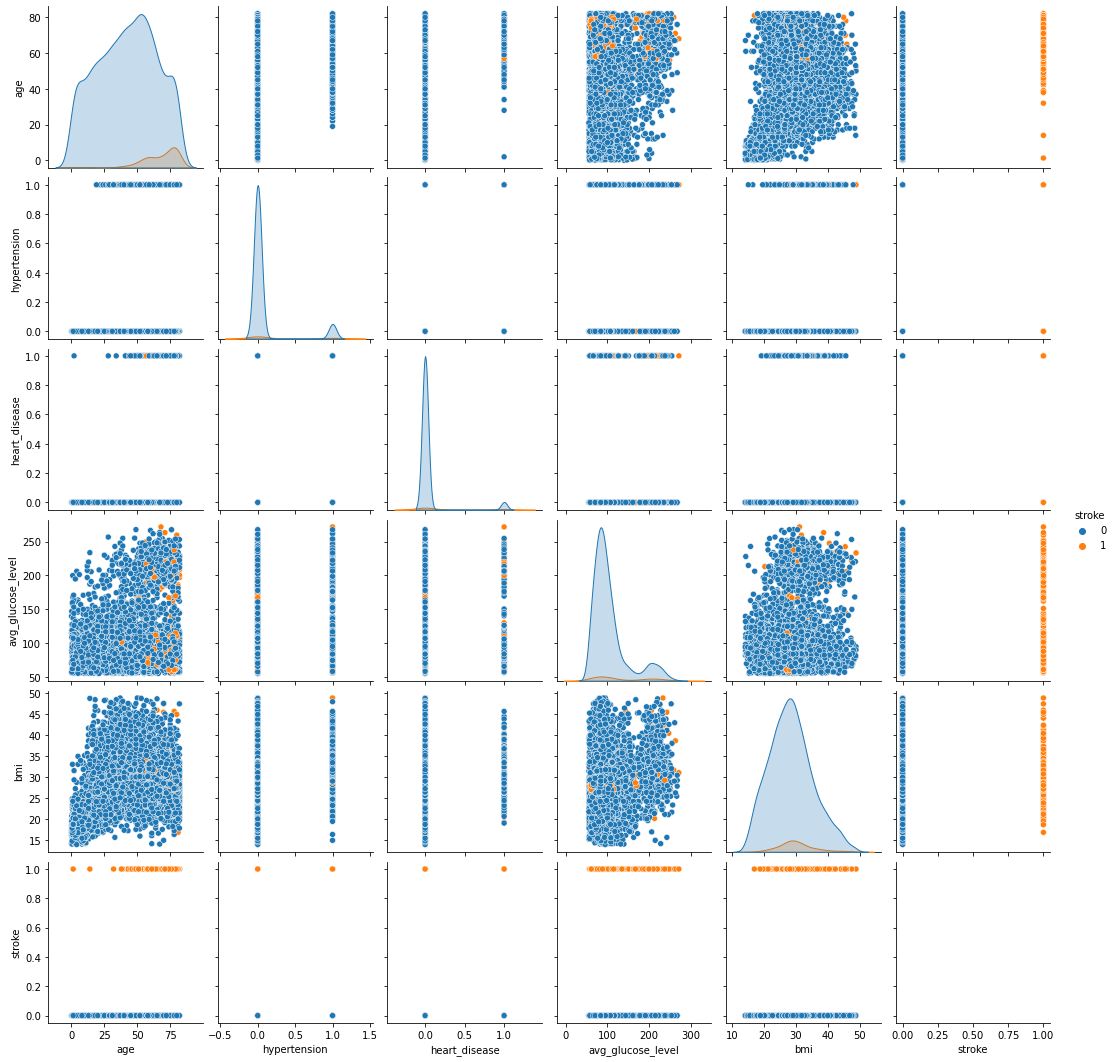

In [21]:
sns.pairplot(data=od,vars=od[num_cols],hue='stroke')
plt.show()

#### Inference:
1)People with age more than 20 years are getting hypertension<br>
2)people with age more than 25 years are getting heart_disease.<br>
3)People with age more than 38 years are getting strokes.<br>
4)A person with heart disease and high glucose level has chances of stroke.<br>
5)A person with high glucose level and BMI has chances of stroke.<br>
6)A person with old age and high BMI has chances of of stroke.<br>

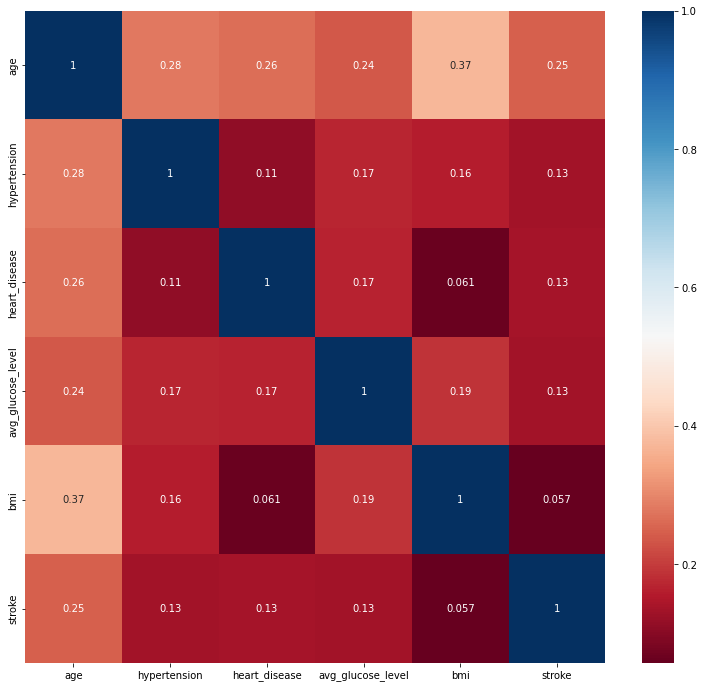

In [22]:
plt.figure(figsize=(13,12))
corr= od.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Inference:
columns have no or low correlation

Outlier Treatment

In [23]:
def outtreat(x):
    x=x.clip(upper=x.quantile(0.97))
    return x

In [24]:
# avg glucose level,bmi
oc=['avg_glucose_level','bmi']
od[oc] = od[oc].apply(outtreat)

Feature Engineering

In [25]:
obj_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [26]:
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [27]:
od.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Feature Enginering

In [28]:
td1=od.copy()

In [29]:
def p_age(x):
    if x<=18:
        return "Children"
    elif x>18 and x <=60:
        return "Adult"
    elif x>60:
        return "Old Age"
    else:
        return "Unknown"

In [30]:
td1["age_group"]=td1["age"].apply(p_age)
td1.drop(columns=["age"], inplace=True)

In [31]:
td1["age_group"].value_counts()

Adult       2807
Old Age     1294
Children     880
Name: age_group, dtype: int64

In [32]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [33]:
lb=LabelEncoder()
for i in obj_cols:
    td1[i]=lb.fit_transform(td1[i])

In [34]:
td1.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,1,0,1,1,1,1,226.864,36.6,1,1,Old Age
1,1,0,1,1,1,0,105.920,32.5,2,1,Old Age
2,0,0,0,1,1,1,171.230,34.4,3,1,Adult
3,0,1,0,1,2,0,174.120,24.0,2,1,Old Age
4,1,0,0,1,1,1,186.210,29.0,1,1,Old Age


In [35]:
for i in td1:
    print(td1[i].value_counts())

0    2907
1    2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
1    3280
0    1701
Name: ever_married, dtype: int64
1    2860
2     804
3     673
0     644
Name: work_type, dtype: int64
1    2532
0    2449
Name: Residence_type, dtype: int64
226.864    150
93.880       6
84.100       5
91.850       5
83.160       5
          ... 
223.360      1
74.650       1
206.590      1
196.330      1
83.940       1
Name: avg_glucose_level, Length: 3747, dtype: int64
43.0    155
28.7     42
28.4     41
27.3     38
27.6     37
       ... 
14.4      2
40.7      1
40.6      1
14.0      1
14.9      1
Name: bmi, Length: 290, dtype: int64
2    1838
0    1500
1     867
3     776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64
Adult       2807
Old Age     1294
Children     880
Name: age_group, dtype: int64


In [36]:
td1.dtypes

gender                 int32
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
age_group             object
dtype: object

In [37]:
td1["age_group"]=lb.fit_transform(td1["age_group"])

In [38]:
td1['age_group'].value_counts()

0    2807
2    1294
1     880
Name: age_group, dtype: int64

In [39]:
for i in td1:
    print(td1[i].value_counts())

0    2907
1    2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
1    3280
0    1701
Name: ever_married, dtype: int64
1    2860
2     804
3     673
0     644
Name: work_type, dtype: int64
1    2532
0    2449
Name: Residence_type, dtype: int64
226.864    150
93.880       6
84.100       5
91.850       5
83.160       5
          ... 
223.360      1
74.650       1
206.590      1
196.330      1
83.940       1
Name: avg_glucose_level, Length: 3747, dtype: int64
43.0    155
28.7     42
28.4     41
27.3     38
27.6     37
       ... 
14.4      2
40.7      1
40.6      1
14.0      1
14.9      1
Name: bmi, Length: 290, dtype: int64
2    1838
0    1500
1     867
3     776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64
0    2807
2    1294
1     880
Name: age_group, dtype: int64


#### Feature Selection

In [40]:
x=td1.drop(columns=["stroke"],axis=1)
y=td1['stroke']

In [41]:
x.shape

(4981, 10)

In [42]:
y.shape

(4981,)

In [43]:
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [44]:
imp=pd.DataFrame({"var":x.columns,"imp":rf.feature_importances_}).sort_values(by=["imp"],ascending=False)

In [45]:
imp

,var,imp
6,avg_glucose_level,0.364540
7,bmi,0.314788
8,smoking_status,0.078902
4,work_type,0.054437
9,age_group,0.046587
0,gender,0.035741
5,Residence_type,0.034827
1,hypertension,0.027338
2,heart_disease,0.023241
3,ever_married,0.019599


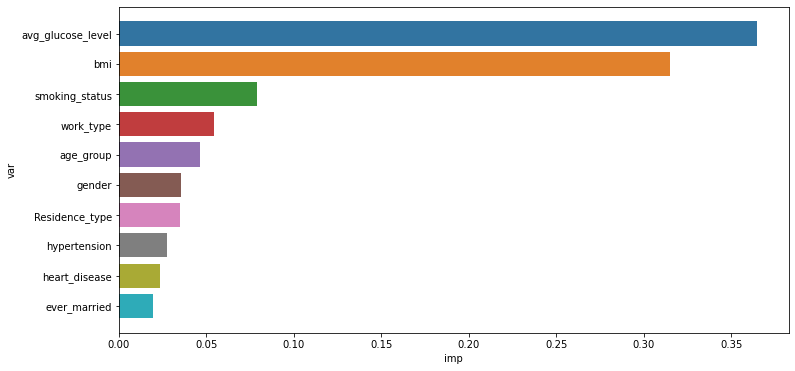

In [46]:
plt.figure(figsize=(12,6))           #to get features with imporrtance relevant for predicition
sns.barplot(x="imp",y="var",data=imp)
plt.plot()
plt.show()

In [47]:
selected_var=imp[imp["imp"]>=0.05]["var"].to_list()         #important variable selection so to ease in prediction
selected_var

['avg_glucose_level', 'bmi', 'smoking_status', 'work_type']

In [48]:
selected_var=td1[['avg_glucose_level', 'bmi', 'smoking_status', 'work_type','age_group','stroke']]

In [49]:
selected_var.dtypes

avg_glucose_level    float64
bmi                  float64
smoking_status         int32
work_type              int32
age_group              int32
stroke                 int64
dtype: object

In [50]:
x1=selected_var.drop(columns=["stroke"],axis=1)
y1=selected_var['stroke']

In [51]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.40,
                                               random_state=2)

In [52]:
x1_train.shape

(2988, 5)

In [53]:
y1_train.shape

(2988,)

In [54]:
x1_test.shape

(1993, 5)

In [55]:
y1_test.shape

(1993,)

In [56]:
def model_metrics2(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    acc_scr = accuracy_score(y_test,ypred)
    pre_scr = precision_score(y_test,ypred)
    rec_scr = recall_score(y_test,ypred)
    cm = confusion_matrix(y_test,ypred)
    cls_rep = classification_report(y_test,ypred)
    return cm,cls_rep, acc_scr,pre_scr,rec_scr

In [57]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

### Balancing Class

Using SMOTE

In [58]:
from collections import Counter

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm=SMOTE()
x1_sm,y1_sm=sm.fit_resample(x1_train,y1_train)

In [61]:
train_smote_count = Counter(y1_sm)
print(train_smote_count)

Counter({0: 2839, 1: 2839})


## Model Development

#### 1.Logistic Regression+SMOTE

In [62]:
lr=LogisticRegression()

In [63]:
lr_cm,lr_cls_rep,lr_acc,lr_pre,lr_rec=model_metrics2(lr,x1_sm,x1_test,y1_sm,y1_test)

In [64]:
lr_cm

array([[1364,  530],
       [  36,   63]], dtype=int64)

In [65]:
res1 = pd.DataFrame({'Model':'LogReg+SMOTE','Acc':lr_acc,'Pre':lr_pre,'Rec':lr_rec},index=[0])
res1

,Model,Acc,Pre,Rec
0,LogReg+SMOTE,0.716006,0.106239,0.636364


#### 2.DecisionTree+SMOTE

In [66]:
dt=DecisionTreeClassifier()

In [67]:
dt_cm,dt_cls_rep,dt_acc,dt_pre,dt_rec=model_metrics2(dt,x1_sm,x1_test,y1_sm,y1_test)

In [68]:
res2 = pd.DataFrame({'Model':'DecisionTree+SMOTE','Acc':dt_acc,'Pre':dt_pre,'Rec':dt_rec},index=[1])
res2

,Model,Acc,Pre,Rec
1,DecisionTree+SMOTE,0.83994,0.101449,0.282828


#### 3.DecisionTree+HT+SMOTE

In [69]:
params={"criterion": ["gini", "entropy"],
       "max_depth" :[7,9,11,13],
       "min_samples_split":[20, 50,150, 300],
       "min_samples_leaf": [5,10,15,30,40]}

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
dtg=DecisionTreeClassifier(random_state=0)     #declaration of model in an object in order to use it in gridsearch

dt_grid=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1,verbose=1)
dt_grid.fit(x1_sm, y1_sm)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11, 13],
                         'min_samples_leaf': [5, 10, 15, 30, 40],
                         'min_samples_split': [20, 50, 150, 300]},
             verbose=1)

In [72]:
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=20,
                       random_state=0)

In [73]:
dt2=DecisionTreeClassifier(criterion='entropy',max_depth=13, min_samples_leaf=5, min_samples_split=20,
                       random_state=0)

In [74]:
dt2.fit(x1_sm,y1_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=5,
                       min_samples_split=20, random_state=0)

In [75]:
dt2.score(x1_test,y1_test)

0.8223783241344707

In [76]:
dt2_cm,dt2_cls_rep,dt2_acc,dt2_pre,dt2_rec=model_metrics2(dt2,x1_sm,x1_test,y1_sm,y1_test)

In [77]:
res3 = pd.DataFrame({'Model':'Dt+HT+SMOTE','Acc':dt2_acc,'Pre':dt2_pre,'Rec':dt2_rec},index=[2])
res3

,Model,Acc,Pre,Rec
2,Dt+HT+SMOTE,0.822378,0.100313,0.323232


#### 4.Random Forest+SMOTE

In [78]:
rf=RandomForestClassifier()

In [79]:
rf_cm,rf_cls_rep,rf_acc,rf_pre,rf_rec=model_metrics2(rf,x1_sm,x1_test,y1_sm,y1_test)

In [80]:
res4 = pd.DataFrame({'Model':'RandomForest+SMOTE','Acc':rf_acc,'Pre':rf_pre,'Rec':rf_rec},index=[3])
res4

,Model,Acc,Pre,Rec
3,RandomForest+SMOTE,0.859508,0.086758,0.191919


#### 5.RF+HT+SMOTE

In [81]:
rf2=RandomForestClassifier()

In [82]:
params={"n_estimators": [50,100,150],
        "criterion":["gini","entropy"],
       "max_depth" :[9,11,13],
       "min_samples_split":[20, 50,100],
       "min_samples_leaf": [15,30,40]
       }

In [83]:
rfg=RandomForestClassifier(random_state=0)     #declaration of model in an object in order to use it in gridsearch

rf_grid=GridSearchCV(estimator=rfg, param_grid=params, cv=5, n_jobs=-1,verbose=1)
rf_grid.fit(x1_sm, y1_sm)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 11, 13],
                         'min_samples_leaf': [15, 30, 40],
                         'min_samples_split': [20, 50, 100],
                         'n_estimators': [50, 100, 150]},
             verbose=1)

In [84]:
rf_grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_leaf=15,
                       min_samples_split=20, n_estimators=50, random_state=0)

In [85]:
rf2=RandomForestClassifier(criterion='gini',max_depth=13, min_samples_leaf=15, min_samples_split=20,
                       n_estimators=200, random_state=0)

In [86]:
rf2.fit(x1_sm,y1_sm)

RandomForestClassifier(max_depth=13, min_samples_leaf=15, min_samples_split=20,
                       n_estimators=200, random_state=0)

In [87]:
rf2_cm,rf2_cls_rep,rf2_acc,rf2_pre,rf2_rec=model_metrics2(rf2,x1_sm,x1_test,y1_sm,y1_test)

In [88]:
res5 = pd.DataFrame({'Model':'RandomForest+HT+SMOTE','Acc':rf2_acc,'Pre':rf2_pre,'Rec':rf2_rec},index=[4])
res5

,Model,Acc,Pre,Rec
4,RandomForest+HT+SMOTE,0.792273,0.113022,0.464646


In [89]:
res = pd.concat([res1,res2,res3,res4,res5])
res

,Model,Acc,Pre,Rec
0,LogReg+SMOTE,0.716006,0.106239,0.636364
1,DecisionTree+SMOTE,0.839940,0.101449,0.282828
2,Dt+HT+SMOTE,0.822378,0.100313,0.323232
3,RandomForest+SMOTE,0.859508,0.086758,0.191919
4,RandomForest+HT+SMOTE,0.792273,0.113022,0.464646


In [90]:
res.to_csv("Brain_stroke_Models.csv")

### Web Deployment

In [91]:
import pickle

In [92]:
pickle.dump(lr,open('log_model.pkl','wb'))
pickle.dump(dt,open('dt_model.pkl','wb'))
pickle.dump(dt2,open('dt2_model.pkl','wb'))
pickle.dump(rf,open('rf_model.pkl','wb'))
pickle.dump(rf2,open('rf2_model.pkl','wb'))

------------------------------------------END----------------------------------